# DOPP 2019W Exercise 3 - Group 32

### Objectives of this notebook

- Are there typical characteristics of refugee origin and destination countries?
- Are there typical characteristics of large flows of refugees?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

pd.options.mode.chained_assignment = None  # default='warn'

In [9]:
#read data_merged, prepared in DOPPEx3.ipynb
data = pd.read_csv('merged.csv',na_values=['..'])
data.set_index(['year','source','destination'],inplace=True)
#temp
data.drop('migrants',axis=1,inplace=True)
display(data)

d_GDP  d_HDI  d_CC.ESTP  d_GE.EST  \
year source      destination                                              
2000 Afghanistan Australia      21679.24784  0.898   1.923246  1.810187   
     Albania     Australia      21679.24784  0.898   1.923246  1.810187   
     Algeria     Australia      21679.24784  0.898   1.923246  1.810187   
     Andorra     Australia      21679.24784  0.898   1.923246  1.810187   
     Angola      Australia      21679.24784  0.898   1.923246  1.810187   
...                                     ...    ...        ...       ...   
2017 Vanuatu     United States  59927.92983  0.919   1.381242  1.554298   
     Viet Nam    United States  59927.92983  0.919   1.381242  1.554298   
     Yemen       United States  59927.92983  0.919   1.381242  1.554298   
     Zambia      United States  59927.92983  0.919   1.381242  1.554298   
     Zimbabwe    United States  59927.92983  0.919   1.381242  1.554298   

                                d_PV.EST  d_RL.EST  RQ.EST_x  d_VA.EST  \
year source      destination                                             
2000 Afghanistan Australia      1.334552  1.751407  1.637249  1.471305   
     Albania     Australia      1.334552  1.751407  1.637249  1.471305   
     Algeria     Australia      1.334552  1.751407  1.637249  1.471305   
     Andorra     Australia      1.334552  1.751407  1.637249  1.471305   
     Angola      Australia      1.334552  1.751407  1.637249  1.471305   
...                                  ...       ...       ...       ...   
2017 Vanuatu     United States  0.335553  1.644761  1.628115  1.049652   
     Viet Nam    United States  0.335553  1.644761  1.628115  1.049652   
     Yemen       United States  0.335553  1.644761  1.628115  1.049652   
     Zambia      United States  0.335553  1.644761  1.628115  1.049652   
     Zimbabwe    United States  0.335553  1.644761  1.628115  1.049652   

                                       s_GDP  s_HDI  s_CC.ESTP  s_GE.EST  \
year source      destination                                               
2000 Afghanistan Australia               NaN  0.345  -1.295380 -2.231651   
     Albania     Australia       1126.683318  0.667  -0.857256 -0.755118   
     Algeria     Australia       1764.888222  0.646  -0.937911 -0.963841   
     Andorra     Australia      21936.530100  0.759   1.359712  1.446284   
     Angola      Australia        556.836318  0.394  -1.522685 -1.462310   
...                                      ...    ...        ...       ...   
2017 Vanuatu     United States   3082.356323  0.595   0.005782 -0.901097   
     Viet Nam    United States           NaN  0.690        NaN       NaN   
     Yemen       United States           NaN  0.463        NaN       NaN   
     Zambia      United States   1534.865371  0.589  -0.542213 -0.627568   
     Zimbabwe    United States   1602.403507  0.553  -1.273584 -1.188722   

                                s_PV.EST  s_RL.EST  RQ.EST_y  s_VA.EST  \
year source      destination                                             
2000 Afghanistan Australia     -2.440187 -1.778437 -2.109626 -2.031417   
     Albania     Australia     -0.537979 -1.008780 -0.254360 -0.285139   
     Algeria     Australia     -1.432010 -1.211336 -0.705386 -1.110052   
     Andorra     Australia      1.167002  1.312131  1.276005  1.535655   
     Angola      Australia     -2.035583 -1.663307 -1.799331 -1.458065   
...                                  ...       ...       ...       ...   
2017 Vanuatu     United States  0.701113  0.487920 -0.331086  0.693794   
     Viet Nam    United States       NaN       NaN       NaN       NaN   
     Yemen       United States       NaN       NaN       NaN       NaN   
     Zambia      United States  0.146180 -0.325046 -0.466104 -0.335299   
     Zimbabwe    United States -0.708677 -1.377855 -1.563330 -1.196420   

                                asylum_seekers  
year source      destination                    
2000 Afghanistan Australia              1326.0  


In [18]:
#define columns to inspect source/origin and destination countires separaetly later
columns_source = ['s_GDP','s_HDI', 's_CC.ESTP', 's_GE.EST', 's_PV.EST', 's_RL.EST', 'RQ.EST_y', 's_VA.EST', 'asylum_seekers'] 
columns_dest = ['d_GDP', 'd_HDI', 'd_CC.ESTP','d_GE.EST', 'd_PV.EST', 'd_RL.EST', 'RQ.EST_x', 'd_VA.EST','asylum_seekers']

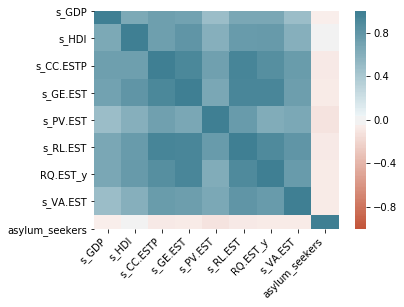

In [24]:
#seaborn heatmaps, more readable heatmaps below
corr = data[columns_source].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

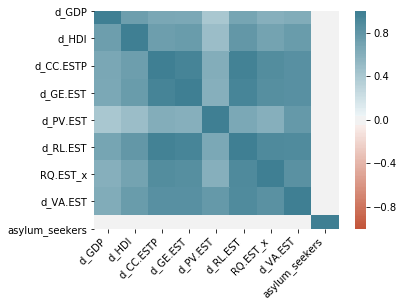

In [23]:
#seaborn heatmaps, more readable heatmaps below
corr = data[columns_dest].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [4]:
# https://github.com/drazenz/heatmap/blob/master/heatmap.py
def heatmap(x, y, **kwargs):
    if 'color' in kwargs:
        color = kwargs['color']
    else:
        color = [1]*len(x)

    if 'palette' in kwargs:
        palette = kwargs['palette']
        n_colors = len(palette)
    else:
        n_colors = 256 # Use 256 colors for the diverging color palette
        palette = sns.color_palette("Blues", n_colors) 

    if 'color_range' in kwargs:
        color_min, color_max = kwargs['color_range']
    else:
        color_min, color_max = min(color), max(color) # Range of values that will be mapped to the palette, i.e. min and max possible correlation

    def value_to_color(val):
        if color_min == color_max:
            return palette[-1]
        else:
            val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            ind = int(val_position * (n_colors - 1)) # target index in the color palette
            return palette[ind]

    if 'size' in kwargs:
        size = kwargs['size']
    else:
        size = [1]*len(x)

    if 'size_range' in kwargs:
        size_min, size_max = kwargs['size_range'][0], kwargs['size_range'][1]
    else:
        size_min, size_max = min(size), max(size)

    size_scale = kwargs.get('size_scale', 500)

    def value_to_size(val):
        if size_min == size_max:
            return 1 * size_scale
        else:
            val_position = (val - size_min) * 0.99 / (size_max - size_min) + 0.01 # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            return val_position * size_scale
    if 'x_order' in kwargs: 
        x_names = [t for t in kwargs['x_order']]
    else:
        x_names = [t for t in sorted(set([v for v in x]))]
    x_to_num = {p[1]:p[0] for p in enumerate(x_names)}

    if 'y_order' in kwargs: 
        y_names = [t for t in kwargs['y_order']]
    else:
        y_names = [t for t in sorted(set([v for v in y]))]
    y_to_num = {p[1]:p[0] for p in enumerate(y_names)}

    plot_grid = plt.GridSpec(1, 15, hspace=0.2, wspace=0.1) # Setup a 1x10 grid
    ax = plt.subplot(plot_grid[:,:-1]) # Use the left 14/15ths of the grid for the main plot

    marker = kwargs.get('marker', 's')

    kwargs_pass_on = {k:v for k,v in kwargs.items() if k not in [
         'color', 'palette', 'color_range', 'size', 'size_range', 'size_scale', 'marker', 'x_order', 'y_order'
    ]}

    ax.scatter(
        x=[x_to_num[v] for v in x],
        y=[y_to_num[v] for v in y],
        marker=marker,
        s=[value_to_size(v) for v in size], 
        c=[value_to_color(v) for v in color],
        **kwargs_pass_on
    )
    ax.set_xticks([v for k,v in x_to_num.items()])
    ax.set_xticklabels([k for k in x_to_num], rotation=45, horizontalalignment='right')
    ax.set_yticks([v for k,v in y_to_num.items()])
    ax.set_yticklabels([k for k in y_to_num])

    ax.grid(False, 'major')
    ax.grid(True, 'minor')
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)

    ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5])
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])
    ax.set_facecolor('#F1F1F1')

    # Add color legend on the right side of the plot
    if color_min < color_max:
        ax = plt.subplot(plot_grid[:,-1]) # Use the rightmost column of the plot

        col_x = [0]*len(palette) # Fixed x coordinate for the bars
        bar_y=np.linspace(color_min, color_max, n_colors) # y coordinates for each of the n_colors bars

        bar_height = bar_y[1] - bar_y[0]
        ax.barh(
            y=bar_y,
            width=[5]*len(palette), # Make bars 5 units wide
            left=col_x, # Make bars start at 0
            height=bar_height,
            color=palette,
            linewidth=0
        )
        ax.set_xlim(1, 2) # Bars are going from 0 to 5, so lets crop the plot somewhere in the middle
        ax.grid(False) # Hide grid
        ax.set_facecolor('white') # Make background white
        ax.set_xticks([]) # Remove horizontal ticks
        ax.set_yticks(np.linspace(min(bar_y), max(bar_y), 3)) # Show vertical ticks for min, middle and max
        ax.yaxis.tick_right() # Show vertical ticks on the right 


def corrplot(data, n_colors, size_scale=500, marker='s'):
    corr = pd.melt(data.reset_index(), id_vars='index')
    corr.columns = ['x', 'y', 'value']
    heatmap(
        corr['x'], corr['y'],
        color=corr['value'], color_range=[-1, 1],
        palette=sns.diverging_palette(20, 220, n=n_colors),
        size=corr['value'].abs(), size_range=[0,1],
        marker=marker,
        x_order=data.columns,
        y_order=data.columns[::-1],
        size_scale=size_scale
    )

### Correlation of asylum seekers with source country metrics  

As seen below, Human Development Index (HDI) and Gross Domestic Product (GDP) of an origin country don't show any correlation at all with the number of refugees fleeing from it. There are a few factors here that show at least some correlation though, namely the origin country's

- Political Stability and Absence of Violence (s_PV)
- Control of Corruption (s_CC) 
- Rule of Law (s_RL)  

as supplied by the World Governance Indicators from the World Bank. The other Indicators also have at least some influence as to the number of refugees in a given year, however the three Indicators above show the highest correlation amongst these.  

Size of the squares also represents correlation, in addition to color, like this: ` size(c1, c2) ~ abs(corr(c1, c2)) `

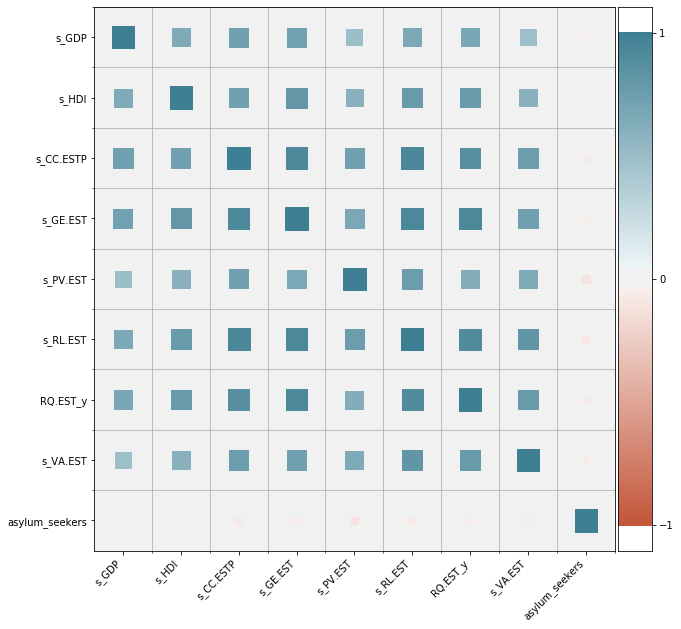

In [21]:
plt.figure(figsize=(10, 10))
corrplot(data[columns_source].corr(),256)

#plt.figure(figsize=(10, 10))
#corrplot(data[columns].corr(),7)

### Correlation of asylum seekers with destination country metrics  

Here, there can be no correlation observed between the Indicators of a country's performance and the number of refugees fleeing to said country. The WGI show up in the heatmap at just a hair below zero (neg. correlation) only when the "steps" of the coloring are reduced from 256 colors to just 7. In this configuration, the Indicators mentioned in the section above are colored in the color that is just one step away from a correlation of zero.  

However, the sqaures displayed are still very small even in this configuration, suggesting that there is no significant correlation after all.

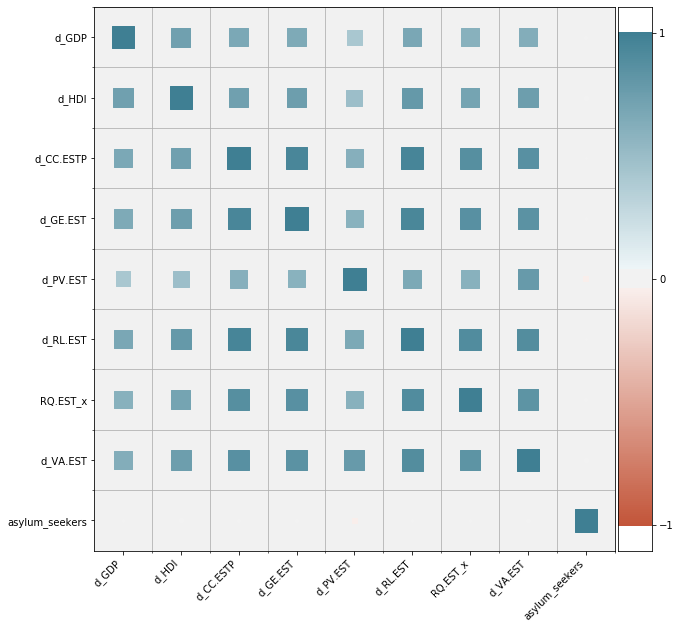

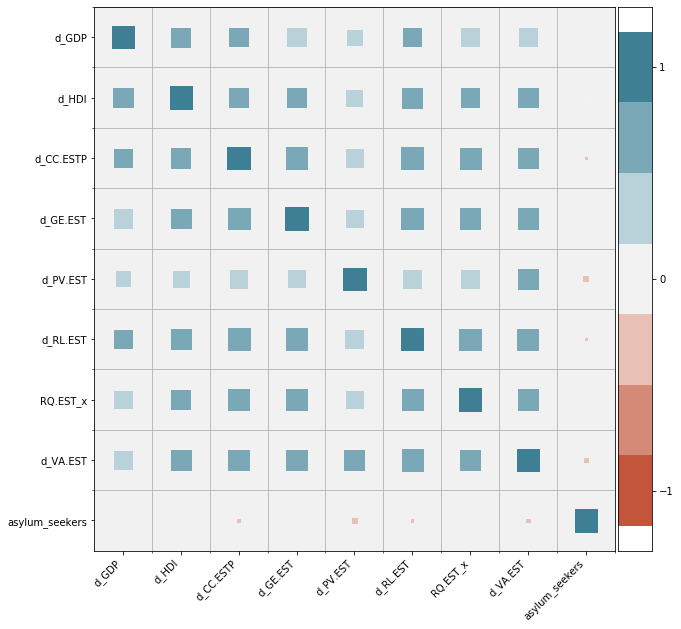

In [22]:
plt.figure(figsize=(10, 10))
corrplot(data[columns_dest].corr(),256)

plt.figure(figsize=(10, 10))
corrplot(data[columns_dest].corr(),7)

### Complete correlation heatmap

Here, we can again observe how turning down the number of possible colors can force some otherwise insignificant values to show up, that would not be visible with more possible colors.

However, at a lower "resolution" we can clearly observe how a source country's Indicators are far more significant to the number of refugees another country recieves than the Indicators of the country they are seeking asylum in.

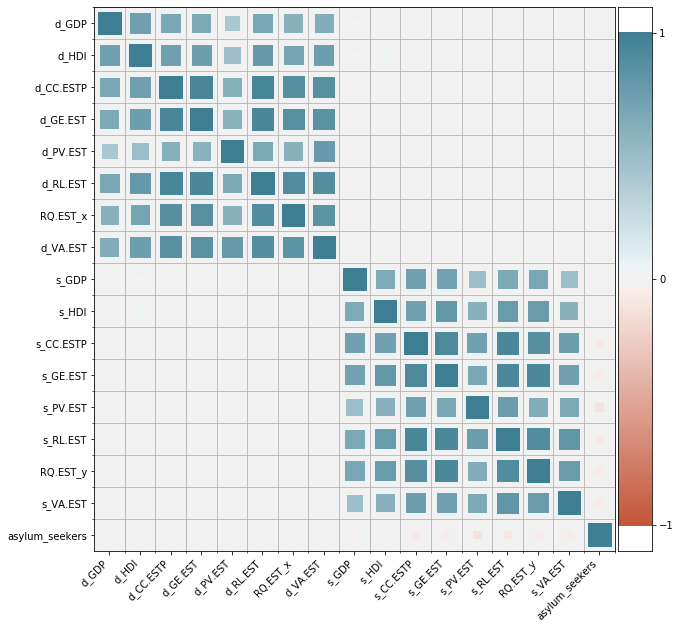

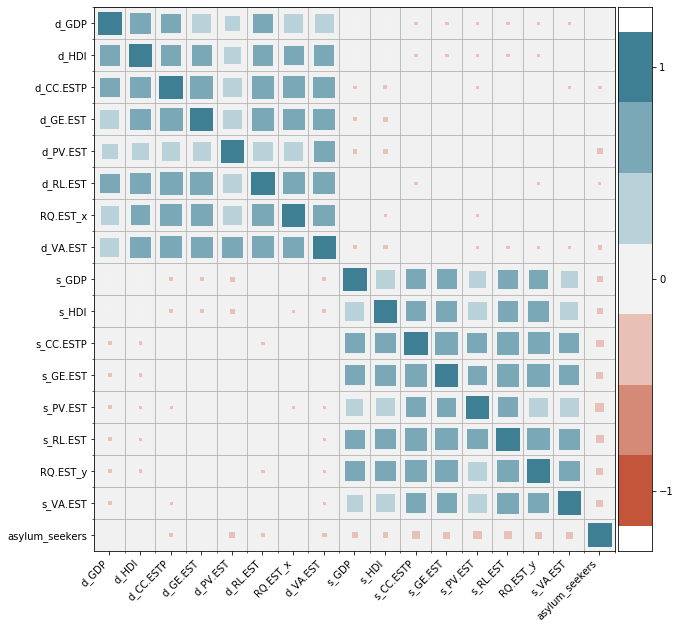

In [7]:
plt.figure(figsize=(10, 10))
corrplot(data.corr(),256)

plt.figure(figsize=(10, 10))
corrplot(data.corr(),7)

Thus, to answer the question from the beginning:

- Are there typical characteristics of refugee origin and destination countries?  

The World Governance Indicators of origin countries negatively correlate with the number of asylum seekers originating from there - when some Indicators decrease, the number of refugees originating from that country tends to increase. Important to notice, HDI and GDP have no correlation with the number of refugees fleeing a country or choosing a country to flee to.

### Country characteristics

The remaining question is as follows:

- Are there typical characteristics of large flows of refugees?

This question is similar to the one before it, and parts of this analysis here are relevant for the other question as well. Typically, large flows of refugees originate from countries with rather negative Indicators from the WGI, as well as lower HDI and GDP. Destination countries typically register a much higher GDP and HDI, as well as much better/higher Indicators from the WGI. 

Another (very important) aspect to notice is the historical and geographical background. Iran and Afghanistan have the highest numbers of refugees fleeing these countries between 2000-2017, and Turkey has the highest influx of refugees in the world in this time period. These countries are, first and foremost, very close geographically, Iran brodering on Turkey and Afghanistan bordering on Iran. It stands to reason that refugees will flee to the nearest, safe country, even if its WGI and other metrics are not as good or as high as some other, far away countries. 

The same pattern is visible when looking at Serbia, producing about 500.000 refugees from 2000 onwards, and Hungary and neighboring states being among the countries with the highest refugee influx. Since we only use data here from 2000 onwards, only a small part of the Yugoslav War (1991-2001) is represented here. Still, it is enough to push Serbia to be the country producing the third-most refuguees in this time period.  

In [68]:
df = data.reset_index()
df.drop('year',axis=1,inplace=True)

#compute mean of all metrics per origin/source country
df_origin = df.groupby('source').mean()
#drop destination metrics
df_origin.drop(['d_GDP', 'd_HDI', 'd_CC.ESTP', 'd_GE.EST', 'd_PV.EST', 'd_RL.EST','RQ.EST_x', 'd_VA.EST'],
               axis=1,inplace=True)
df_origin.rename(columns={'asylum_seekers':'asylum_seekers_produced_sum'},inplace=True)
#replace mean refugees by sum of all refugees produced
df_origin['asylum_seekers_produced_sum'] = df.groupby('source')['asylum_seekers'].sum()
#sort by number of refugees
df_origin.reset_index(inplace=True)
df_origin.sort_values('asylum_seekers_produced_sum',ascending=False,inplace=True)


#compute mean of all metrics per destination country
df_dest = df.groupby('destination').mean()
#drop source metrics
df_dest.drop(['s_GDP', 's_HDI', 's_CC.ESTP', 's_GE.EST','s_PV.EST', 's_RL.EST', 'RQ.EST_y', 's_VA.EST'],
               axis=1,inplace=True)
df_dest.rename(columns={'asylum_seekers':'asylum_seekers_sum'},inplace=True)
#replace mean refugees by sum of all refugees recieved
df_dest['asylum_seekers_sum'] = df.groupby('source')['asylum_seekers'].sum()
#sort by number of refugees
df_dest.reset_index(inplace=True)
df_dest.sort_values('asylum_seekers_sum',ascending=False,inplace=True)


display(df_origin.head(33))
display(df_dest)

,source,s_GDP,s_HDI,s_CC.ESTP,s_GE.EST,s_PV.EST,s_RL.EST,RQ.EST_y,s_VA.EST,asylum_seekers_produced_sum
0,Afghanistan,434.940185,0.436389,-1.453177,-1.392015,-2.444037,-1.691961,-1.493031,-1.248028,976885.0
78,Iraq,4550.012894,0.643889,-1.356803,-1.410282,-2.308381,-1.588079,-1.359032,-1.269237,920022.0
148,Serbia,4865.650987,0.755833,-0.417909,-0.179132,-0.383012,-0.499182,-0.238223,0.106312,510607.0
35,China,4214.677493,0.679556,-0.436051,0.104782,-0.477403,-0.473268,-0.256744,-1.603286,399944.0
127,Pakistan,946.949621,0.511389,-0.924884,-0.619368,-2.226004,-0.836951,-0.657905,-0.897283,348218.0
122,Nigeria,1850.077471,0.494733,-1.157701,-1.028223,-1.898118,-1.148494,-0.877577,-0.642141,314011.0
54,Eritrea,452.466355,0.429077,-0.546819,-1.303421,-0.747992,-1.204166,-1.941494,-2.074749,284907.0
155,Somalia,298.340083,NaN,-1.648837,-2.161096,-2.729802,-2.320706,-2.317282,-1.899408,275817.0
171,Turkey,8749.581632,0.729667,-0.067073,0.201754,-1.046886,0.022194,0.258593,-0.202665,248688.0
107,Mexico,8936.211095,0.738056,-0.418283,0.188199,-0.568009,-0.474725,0.339227,0.139745,207096.0


,destination,d_GDP,d_HDI,d_CC.ESTP,d_GE.EST,d_PV.EST,d_RL.EST,RQ.EST_x,d_VA.EST,asylum_seekers_sum
31,Turkey,8764.306385,0.729818,-0.066459,0.202254,-1.046695,0.022436,0.258920,-0.202304,248688.0
20,Mexico,8940.744912,0.738120,-0.418129,0.188357,-0.568554,-0.474939,0.339240,0.139737,207096.0
12,Hungary,11619.817265,0.813593,0.442830,0.719219,0.819691,0.757258,1.008840,0.871314,24617.0
26,Slovak Republic,14075.163077,NaN,0.256690,0.809947,0.920109,0.507215,0.970991,0.936819,23470.0
5,Czech Republic,16078.216654,NaN,0.382494,0.938729,0.945290,0.953057,1.112374,0.984522,15569.0
24,Poland,10432.865571,0.826633,0.500165,0.588406,0.700105,0.629393,0.883129,0.982242,12176.0
33,United States,47760.637578,0.903886,1.469466,1.578176,0.433547,1.592414,1.490531,1.172346,9900.0
15,Israel,28228.263171,0.881557,0.937155,1.258308,-1.211424,0.962427,1.120102,0.678143,9495.0
18,Latvia,10878.737869,0.807594,0.290026,0.714569,0.559607,0.708490,1.000922,0.796926,3153.0
4,Chile,10531.810337,0.803756,1.414475,1.164934,0.557182,1.302725,1.442073,1.069255,2543.0
